# **PROYECTO: "Aplicación de Modelos ML para la Identificación de la Potencial Fuga de Clientes del Servicio de Tarjeta de Créditos de un Banco"** #

**Data:**
> **BankChurners.csv**
>
> - Este conjunto de datos se obtuvo de consultar un determinado tiempo la sgte url: ‎‎https://leaps.analyttica.com/home‎‎.
> - Esta data contiene 10.000 clientes que mencionan su edad, salario, marital_status, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. 

**Link de los data:**
> https://www.kaggle.com/sakshigoyal7/credit-card-customers?select=BankChurners.csv

**Contribuidores:**
> - Heydy Carrasco - heydy.carrasco.huaccha@gmail.com
> - Alex Rivera - alexriveracruz4@gmail.com
> - Martin Delgado - martindelhu1302@gmail.com
> - Angel Jorge - 1jssangel1@gmail.com


In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')

#**1.- Comprension del Negocio**

Un gerente de banco se siente incómodo por que cada vez más clientes abandonan sus servicios de tarjeta de crédito. Asi que se encuentra en busca de soluciones que le permitan tomar acciones de manera proactiva frente al cliente para brindarle un mejor servicio y/u ofertas que ayuden a cambiar su decision.

> **Objetivo**: 
>
> Ofrecer productos de análitica que ayuden a retener e identificar a clientes que puedan salir del banco / Usando modelos de ML se busca predecir el abandono de servicios de la tarjeta de credito

### **> Problema**


- El aumento progresivo de casos de desercion de servicios de tarjeta de crédito en el banco.

### **> Planteamiento del problema** 
- ¿Como un modelo predictivo ayudara a la identificacion de la fuga del cliente?

##**Análisis Exploratorio**##

In [ ]:
# Importar los datos desde el repositorio
banco = pd.read_csv("https://raw.githubusercontent.com/MayumyCH/credit_card_project_pyhton/main/data/BankChurners.csv", sep = ",")
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#Eliminando variables que provienen de otro modelo de clasificacion
array_delete = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
banco = banco.drop(array_delete, axis = 1)
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#Estructura de los datos#
banco.shape

(10127, 21)

In [ ]:
banco.info()
# Interpretacion
# Se observa:
# 6 variables tipo object (Categoricas)
# 15 variables numericas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# No existe datos nulos
banco.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#¿Existen clientes Duplicados?
num = banco['CLIENTNUM']
banco[num.isin(num[num.duplicated()])]

# RPTA: No hay ningun cliente duplicado

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


**Comentario:** Por lo tanto se observa que tenemos 10127 clientes unicos dentro de nuestra base de los cuales poseemos 6 variables categoricas y 15 variables numericas

In [ ]:
# Definimos las variables que trataremos como numericas y como categoricas de nuesto dataset generado
varCategoricas = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
varNumericas = ['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

### 2.3.2.- Analisis Univariante
####Analisis de Categóricas####


In [ ]:
# Cantidad de categorias por variables categoricas
banco.select_dtypes(['object']).nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [ ]:
pip install pywaffle


     |████████████████████████████████| 532kB 5.6MB/s 


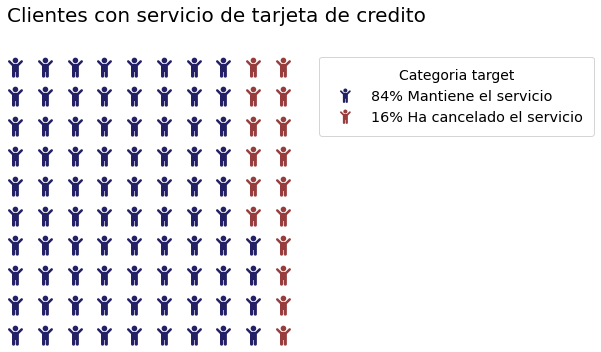

In [ ]:
from pywaffle import Waffle
group_Flag= banco.groupby('Attrition_Flag')['CLIENTNUM'].count()/len(banco) * 100
# Attrited Customer    16.065962
# Existing Customer    83.934038

data = {'84% Mantiene el servicio': group_Flag[1],'16% Ha cancelado el servicio': group_Flag[0]}
fig = plt.figure(
   FigureClass=Waffle, 
    rows=10,
    figsize=(10, 5),
    values=data,
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.04, 1),'borderpad':0.8,
            'fontsize': 12,'title':'Categoria target','fontsize':'x-large','title_fontsize':14
           },
    icons='child', icon_size=20, 
    icon_legend=True,
    title = {'label': 'Clientes con servicio de tarjeta de credito \n', 'loc': 'left','fontsize': 20}
)

**Comentario:** De nuestra variable objetivo se observa que el 84% de los clientes dentro de nuestra base de análisis se mantienen dentro del servicio de tarjetas de crédito del banco, mientras que el 16% fuga. 
Para nuestra tarea de modelamiento nuestros datos estan desbalanceados.

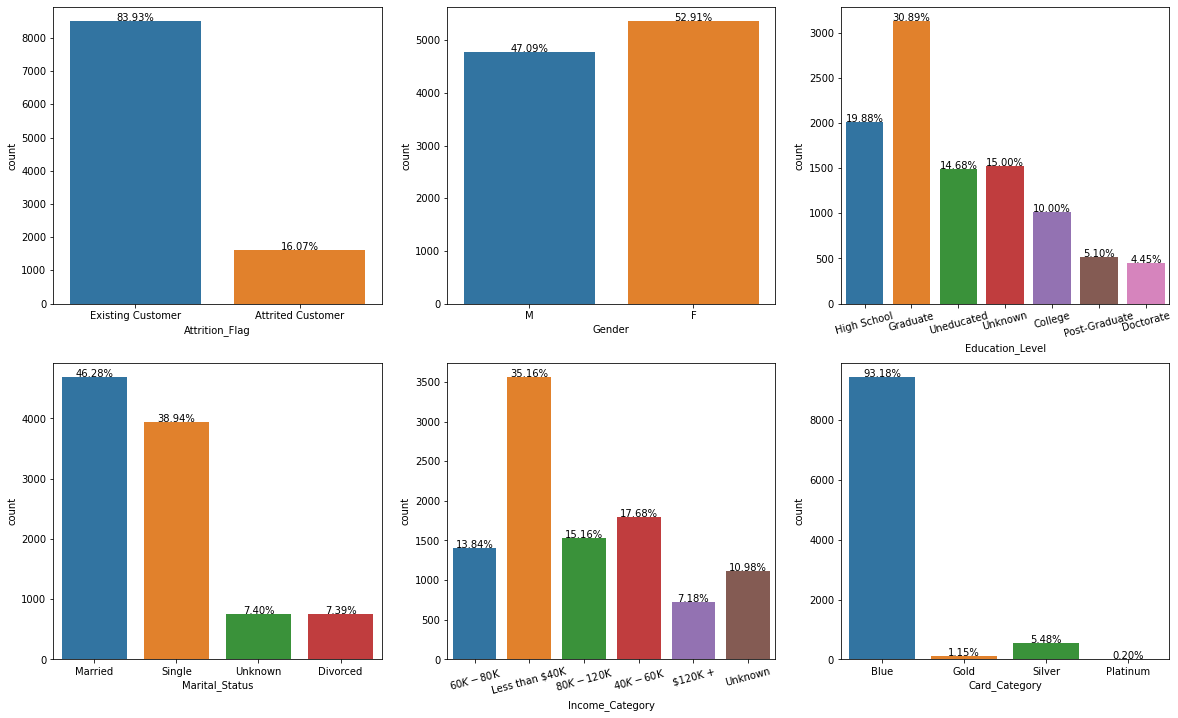

In [ ]:
def pltCountplot(cats,data):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=data, ax=axis[i][j])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center") 
            index += 1

pltCountplot(varCategoricas,banco)

In [ ]:
# Interpretación

# Education_level
# - 40.44% Educacion superior (Graduate, Post-Graduate, Doctorate)
# - 29.88% Educacion basica (High School,College) 
# - 14.68% Uneducated
# - 15.00% Unknown 

# Income_category
# - 35.16% Menos de 40K
# - 32.84% Estan entre <40K,80K>
# - 15.16% Estan entre <80K,120K>
# - 7.18% Estan mas de 120K
# - 10.98% Unknown

In [ ]:
banco.describe()

# Interpretación
# Customer_Age
# - La # minima edad es 26 y como maximo 73
# - De todos los registros obtenidos solo el 25% de datos tiene mas de 52 años 
# - El 50% de los registros se concentra en edades de 41 a 52 años, esto nos indicaria que aqui esta la mayor tasa de fuga
# - El std = 8.01 => nuestros valores tienen dispersion
# - El cv = std/mean = 8.01/46.3 = 0.17 => datos con tendencia a ser homogeneos *** DUDA
# - EXISTE 2 OUTLIERS - los cuales por la misma distribución podrian ser reemplazados por el Percentil 90

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
def analisisNumericas(df, variable):

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

#################### CLIENTNUM ####################
                     Histograma                     


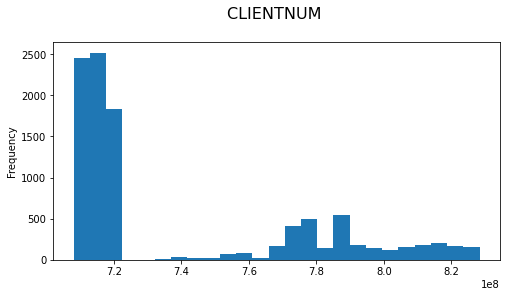



                     Boxplot                     


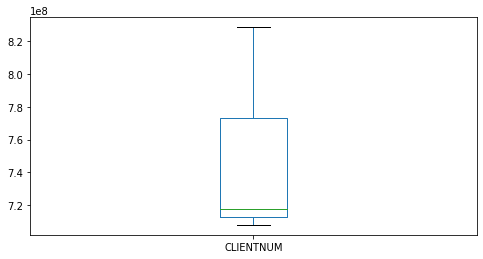




#################### Customer_Age ####################
                     Histograma                     


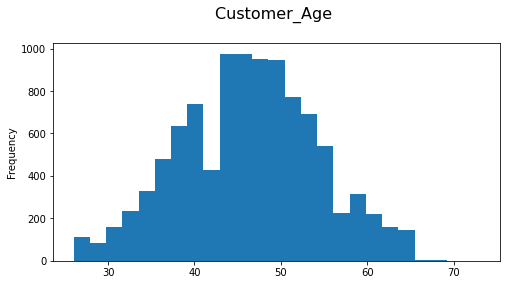



                     Boxplot                     


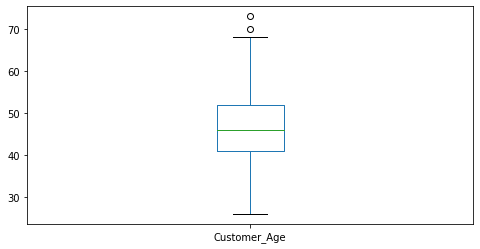




#################### Dependent_count ####################
                     Histograma                     


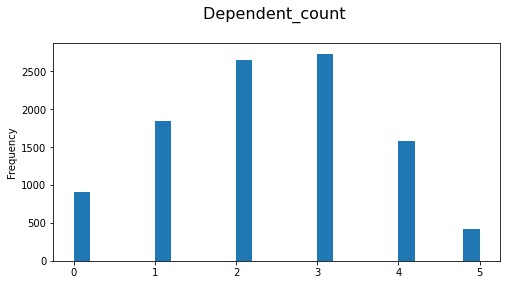



                     Boxplot                     


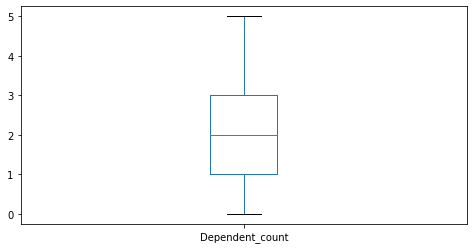




#################### Months_on_book ####################
                     Histograma                     


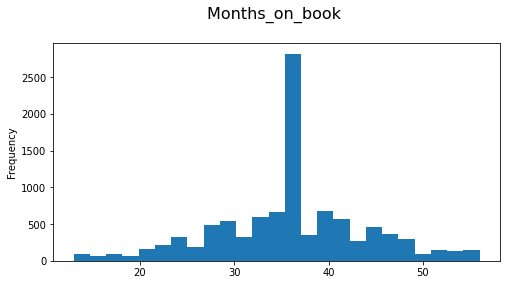



                     Boxplot                     


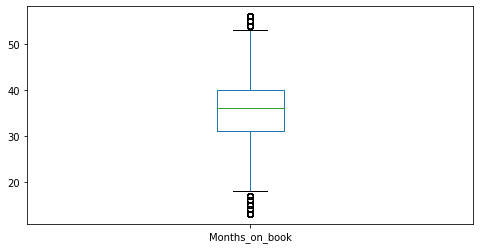




#################### Total_Relationship_Count ####################
                     Histograma                     


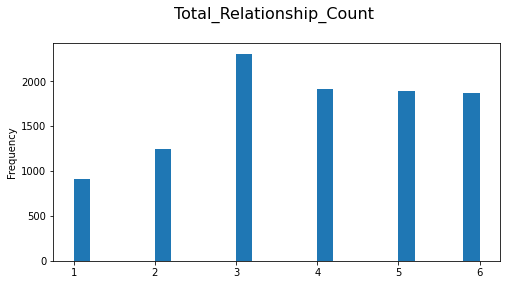



                     Boxplot                     


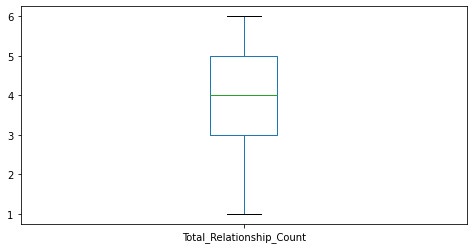




#################### Months_Inactive_12_mon ####################
                     Histograma                     


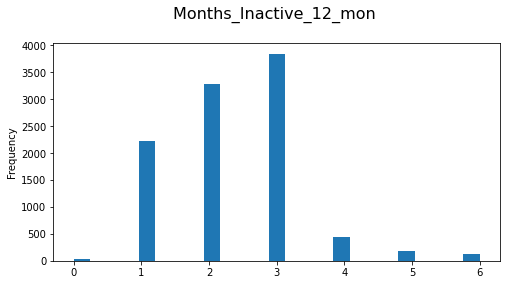



                     Boxplot                     


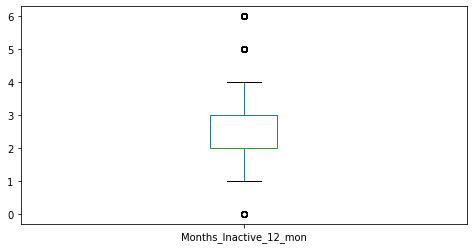




#################### Contacts_Count_12_mon ####################
                     Histograma                     


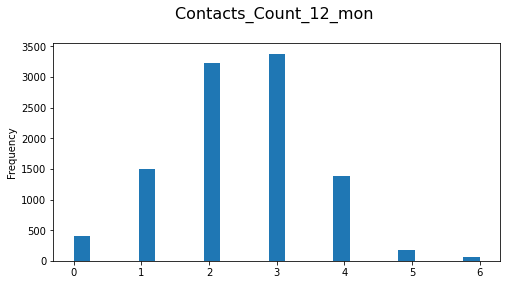



                     Boxplot                     


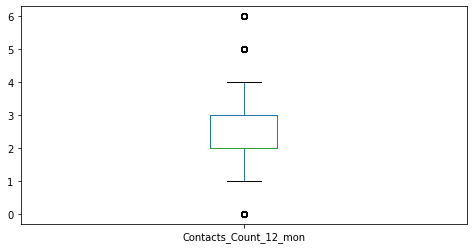




#################### Credit_Limit ####################
                     Histograma                     


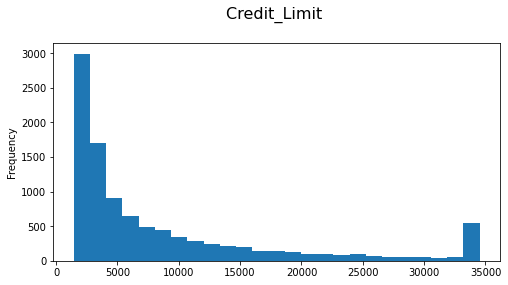



                     Boxplot                     


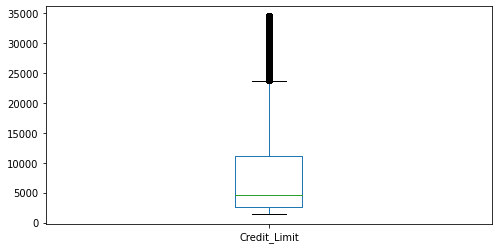




#################### Total_Revolving_Bal ####################
                     Histograma                     


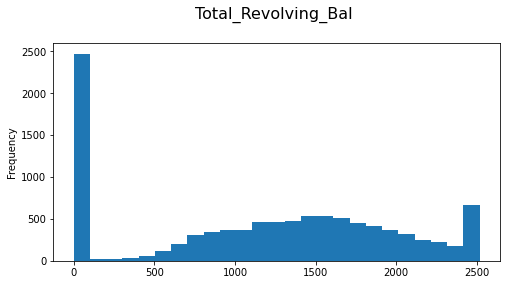



                     Boxplot                     


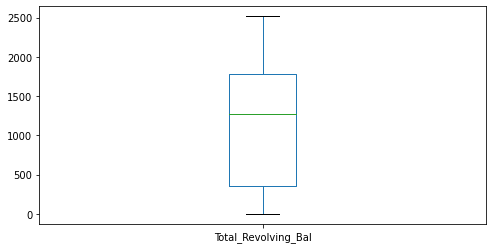




#################### Avg_Open_To_Buy ####################
                     Histograma                     


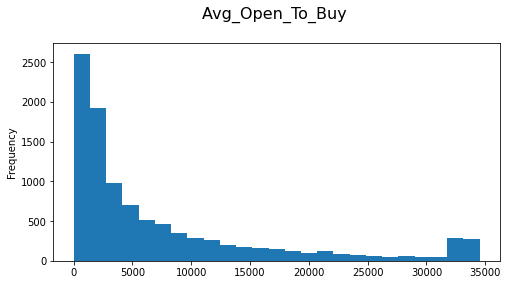



                     Boxplot                     


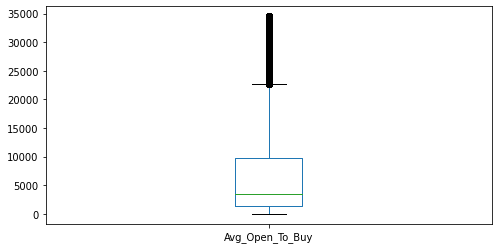




#################### Total_Amt_Chng_Q4_Q1 ####################
                     Histograma                     


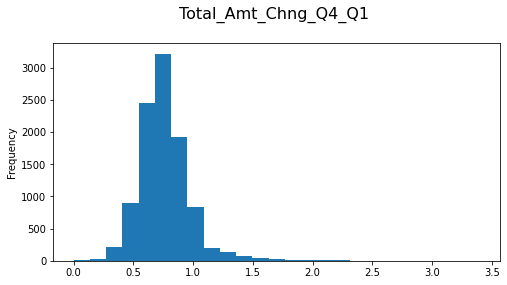



                     Boxplot                     


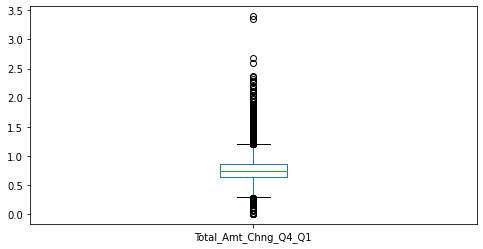




#################### Total_Trans_Amt ####################
                     Histograma                     


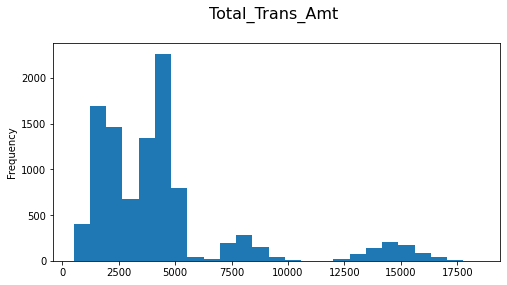



                     Boxplot                     


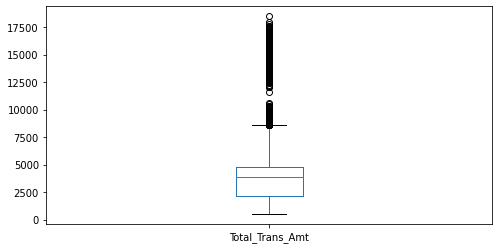




#################### Total_Trans_Ct ####################
                     Histograma                     


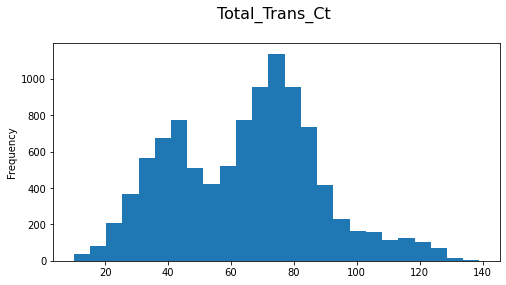



                     Boxplot                     


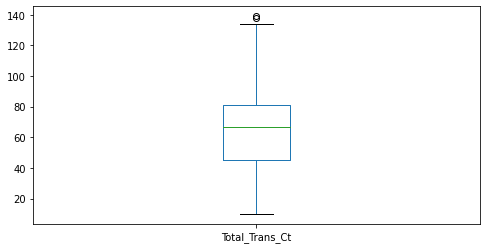




#################### Total_Ct_Chng_Q4_Q1 ####################
                     Histograma                     


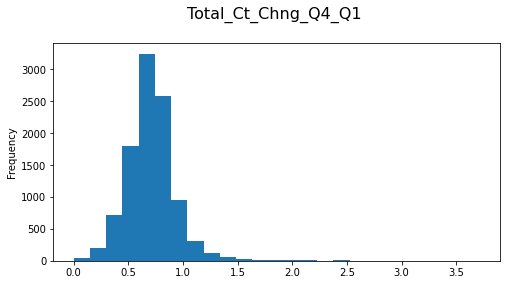



                     Boxplot                     


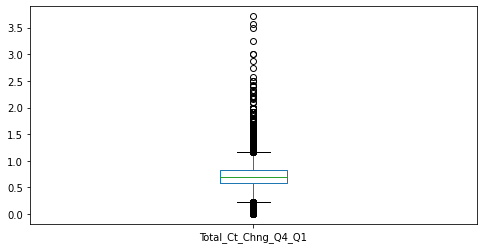




#################### Avg_Utilization_Ratio ####################
                     Histograma                     


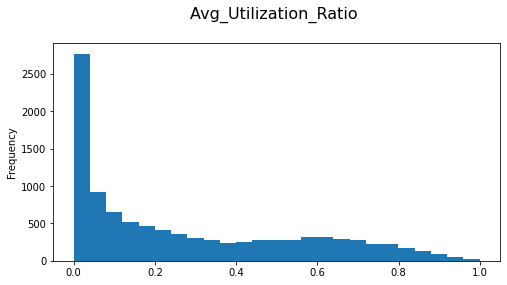



                     Boxplot                     


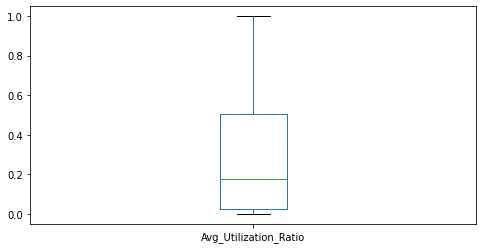

In [ ]:
for numerica in varNumericas:
  print("#"*20,numerica,"#"*20)
  analisisNumericas(banco, numerica)
  print("\n\n")

**Comentario:** Del análisis de las variables numericas se puede observar lo siguiente:
1. **Edad del cliente:** Sigue una distribución normal, posee 2 outlier por lo cual podriamos eliminarlos o reemplazarlos por el percentil 90
2. **Número de dependientes:** Sigue una distribucion normal graficamente y no posee outliers.
3. **Meses con el banco:** Gráficamente se observa una distribución normal, posee outliers inferiores y superiores por lo que se tendria que reemplazar por alguno de los percentiles.
4. **Número total de productos:** Gráficamente no sigue una distribución normal y no posee outliers (Se deberia aplicar una transformación).
5. **Meses Inactivos (Últimos 12 meses):** Gráficamente se observa una leve aproximacion a la distribución normal , posee algunos outliers.
6. **Contactos en los últimos 12 meses:** Gráficamente posee una aproximación a la distribución normal con algunos outliers.
7. **Limite de la tarjeta de crédito:** Se observa que no sigue una distribución normal y posee outliers superiores.
8. **Saldo Rotatorio en la tarjeta de crédito:** Se observa que no sigue una distribución normal y no posee outliers.
9. **Promedio de saldo para comprar:** Se observa qu no sigue una distribución normal y posee outliers.
10. **Cambio en el monto de transaccion:** Gráficamente se aproxima a una normal pero posee outliers superiores e inferiores.
11. **Monto total de transaccion (Últimos 12 meses):** No sigue una distribución normal, posee outliers superiores.
12. **Recuento total de transacciones (Últimos 12 meses)**: No sigue una distribución normal, posee outliers superiores.
13. **Cambio en el recuento de transacciones:** Sigue una distribución normal, posee outliers superiores e inferiores.
14. **Índice de utilización de tarjeta de crédito:** No posee una distribucion normal, no posee outliers.

In [ ]:
#Variables propias del cliente - Demograficas#
demograficas=pd.concat([banco['Customer_Age'],banco['Gender'],banco['Education_Level'],banco['Marital_Status'],banco['Income_Category'],banco['Attrition_Flag']],axis=1)

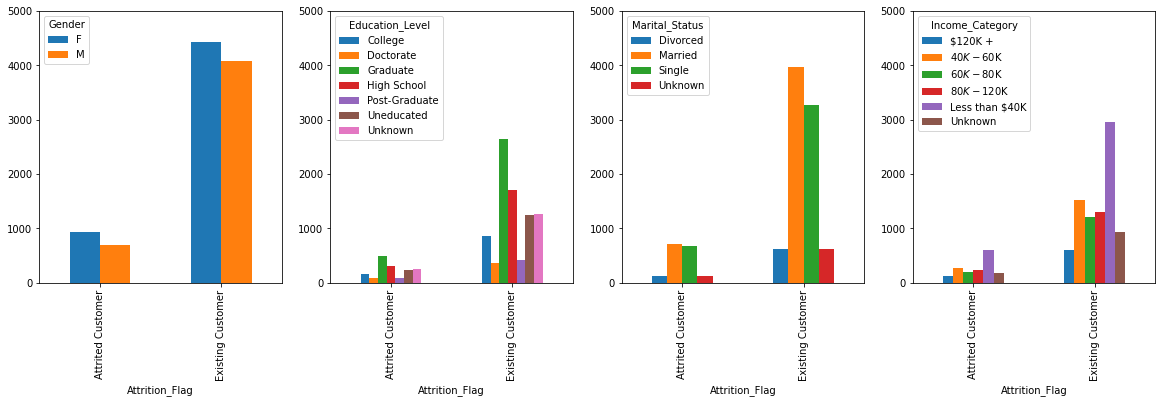

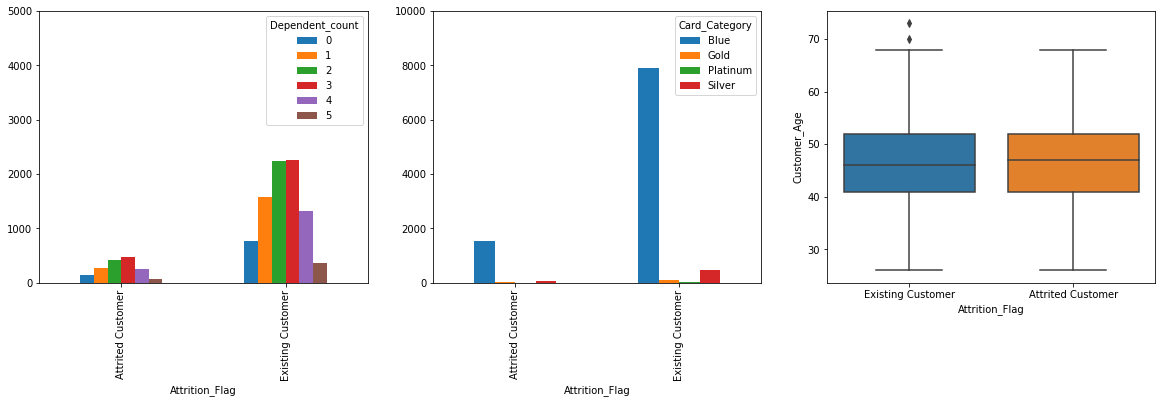

In [ ]:
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(banco['Attrition_Flag'],banco['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(banco['Attrition_Flag'],banco['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(banco['Attrition_Flag'],banco['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = demograficas,x='Attrition_Flag',y='Customer_Age', ax=ax3)

**Comentario:** Se observa que para las variables propias del clientes (demógraficas) la distribucion entre los clientes que fugan y permanecen es similar. Esto nos llevaria a la conclusión de que por si solas no definen si un cliente fuga o no.

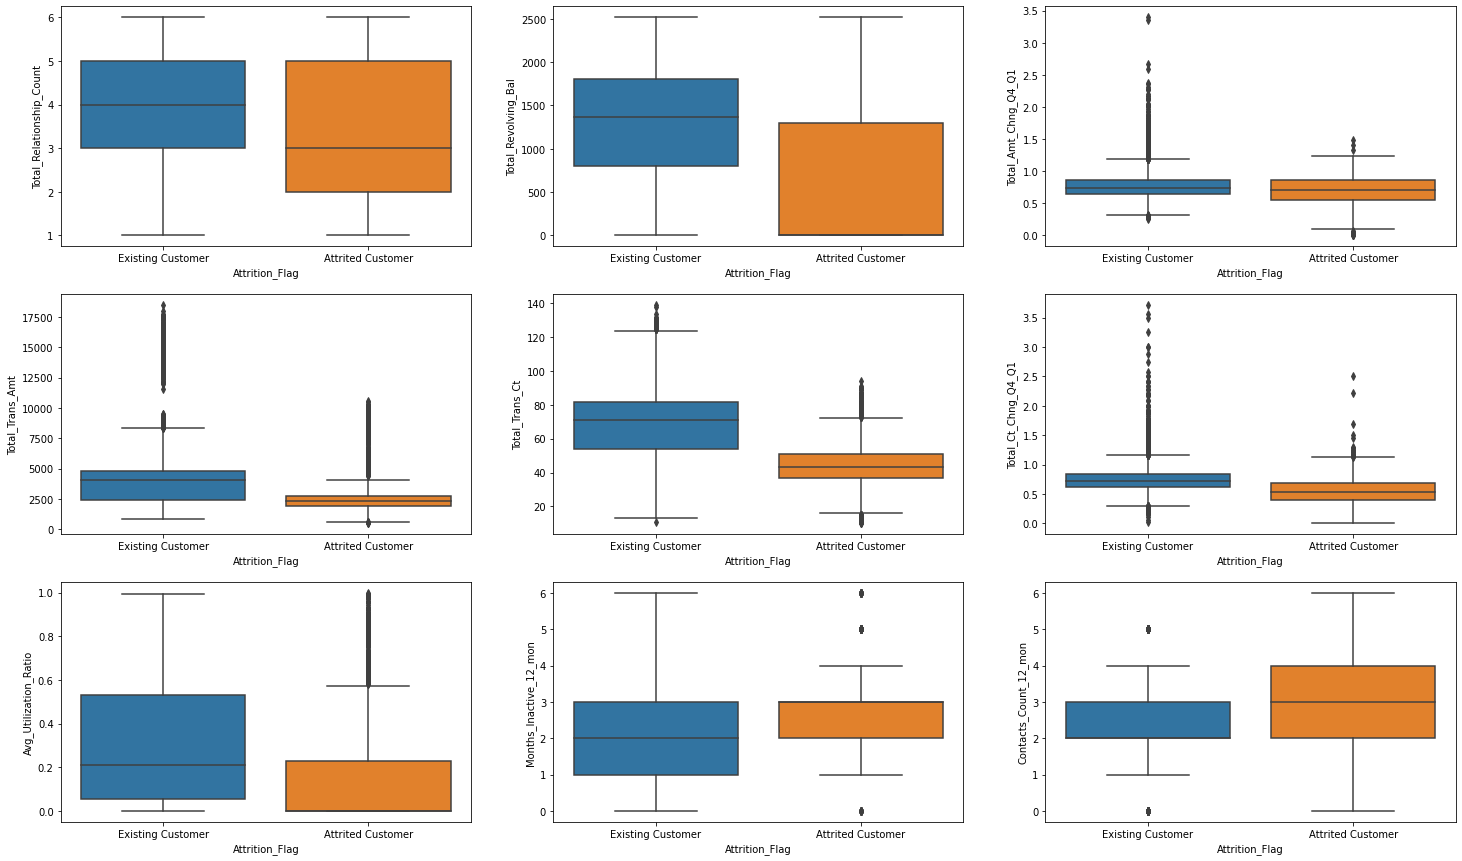

In [ ]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))

sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=banco, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=banco, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=banco, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=banco, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=banco, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=banco, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=banco, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=banco, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon", data=banco, ax=axes[2,2])

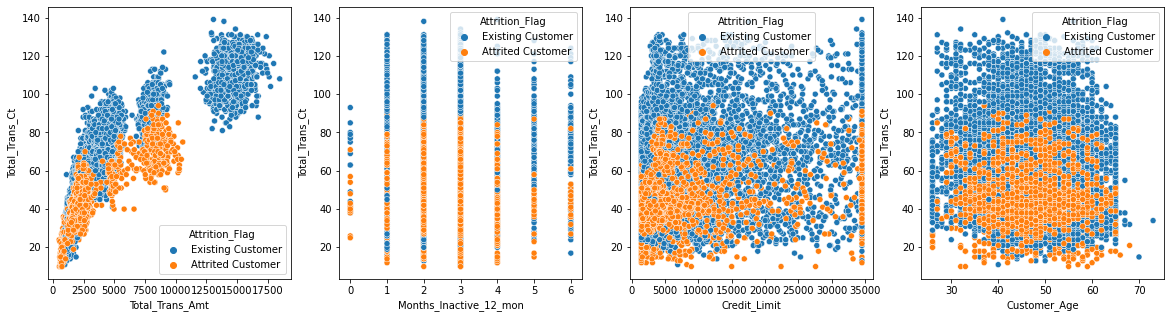

In [ ]:
df_frequency=pd.concat([banco['Customer_Age'],banco['Total_Trans_Ct'],banco['Total_Trans_Amt'],banco['Months_Inactive_12_mon'],banco['Credit_Limit'],banco['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

De estos gráficos se puede señalar que:
1. Cuanto mayor sea el gasto anual, es más probable que los clientes se queden.
2. Después de los 2 meses de inactividad, los clientes son más propensos a marcharse.
3. Cuanto más alto sea el límite de crédito, es más probable que los clientes permanezcan.
4. La distribución de la edad no importa realmente en este caso, porque los grupos se superponen en gran medida.
5. Casi todos los clientes que se dan de baja han utilizado sus tarjetas menos de 100 veces.

**Análisis de Correlacion**

Como dentro de nuestra base de datos poseemos datos con caracteristicas mixtas: categóricas y numéricas, no bastara unicamente utilizar simplemente la funcion de correlación estandar. Lo que se realizara es la division de caracteristicas en tablas separadas una para las numericas (Pearson) y otra para las categoricas (V de Cramer).


In [ ]:
#Correlacion entre variables Categoricas#
df_categorical=banco.loc[:,banco.dtypes==np.object]
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [ ]:
df_numerical=banco.loc[:,banco.dtypes!=np.object]
df_numerical['Attrition_Flag']=banco.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


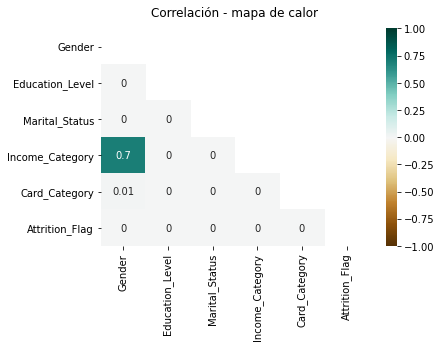

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 

for i in df_categorical.columns :
  df_categorical_encoded[i]=label.fit_transform(df_categorical[i])

from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in df_categorical_encoded:
  col = []
  for var2 in df_categorical_encoded :
    cramers =cramers_V(df_categorical_encoded[var1], df_categorical_encoded[var2]) 
    col.append(round(cramers,2)) 
  rows.append(col)
  
cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns = df_categorical_encoded.columns, index =df_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlación - mapa de calor', fontdict={'fontsize':12}, pad=12);

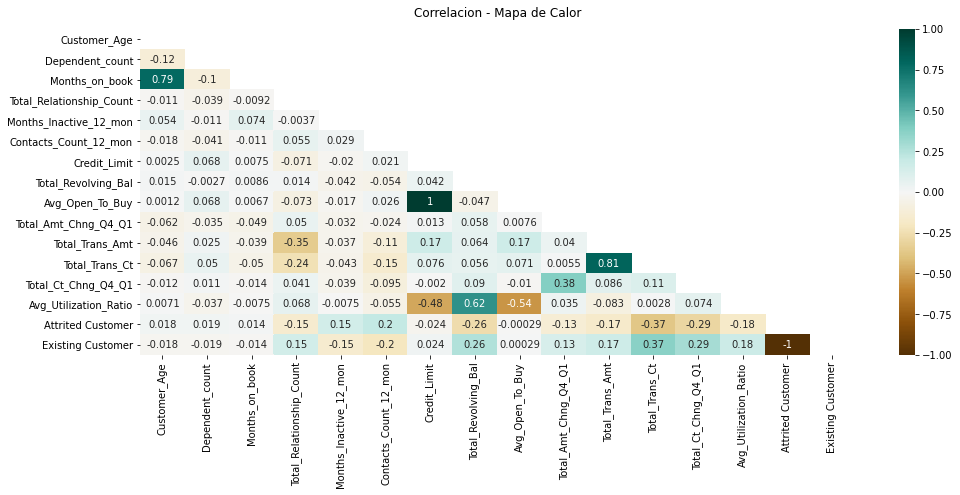

In [ ]:
from scipy import stats
num_corr=df_numerical.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlacion - Mapa de Calor', fontdict={'fontsize':12}, pad=12);

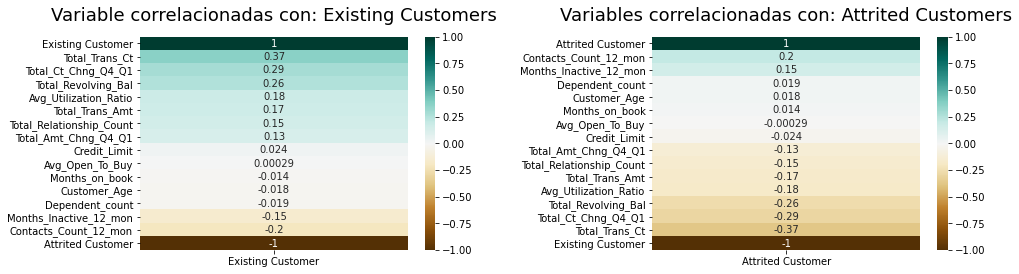

In [ ]:
#Haciendo un zoom de variables numericas correlacionadas con cada categoria del objetivo#
fig, ax=plt.subplots(ncols=2,figsize=(15, 5))

heatmap = sns.heatmap(num_corr[['Existing Customer']].sort_values(by='Existing Customer', ascending=False), ax=ax[0],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variable correlacionadas con: Existing Customers', fontdict={'fontsize':18}, pad=16);
heatmap = sns.heatmap(num_corr[['Attrited Customer']].sort_values(by='Attrited Customer', ascending=False), ax=ax[1],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlacionadas con: Attrited Customers', fontdict={'fontsize':18}, pad=16);

fig.tight_layout(pad=5)

**Comentario:** De aqui se puede observar lo siguiente: En cuanto a las categoricas se observa que no existe alguna correlacion entre las variables categoricas y la variable objetivo. Esto corroborra los puntos observados en la distribucion donde ambas categorias tenian la misma distribucion tanto para los que se quedaban como para los que se iban. Dentro de las variables numericas se puede observar que tanto el limite de credito, el monto promedio para comprar, el tiempo que el cliente este en el banco, la edad y el numero de dependiente en el hogar poseen una correlacion menor a 0.1 (+,-) por lo que no seran consideradas en el modelo.

###**Hipótesis (Luego del Análisis Descriptivo)**###


1. Un modelo de predicción nos ayudará a clasificar los tipos de clientes(fuga y permanencia) en más del 50%.
2. Este punto se dio de feedback : Identificar patrones dentro de los clientes que "fugan" del banco a traves de tecnicas de clustering nos ayudaria a identificar cuando un cliente este a punto de retirarse. 

##**Preparacion de los datos**##

In [ ]:
#Aqui podriamos realizar los cambios Normalizacion, tranformacion, imputaciones y demas de los datos# 
#Inicialmente probare como se desenvuelve un modelo con los datos como los tenemos# 
#Limpieza de outliers por el z score#
from scipy import stats
import numpy as np
columnas = ["Customer_Age", 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
print(banco.shape)
for columna in columnas : 
    z = np.abs(stats.zscore(banco[columna]))
    banco=banco[(z < 3)]
print(banco.shape)


(10127, 21)
(9317, 21)


**Comentario:** Al realizar tantos ajustes a la data podria llevarnos a perder informacion valiosa por lo que se utilizara modelos robustos para la data comenzando por un Rf comparado con una regresion logistica que segun antecendes es la utilizada mayormente en tema de fuga dentro de bancos.

##**Modelamiento**##

In [ ]:
#Seleccion de variables Correlacionadas#
dt_modelo=banco
dt_modelo=dt_modelo.drop(['CLIENTNUM','Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)
dt_modelo.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,Existing Customer,M,Graduate,Married,$40K - $60K,Blue,3,1,2,1247,1.376,1088,24,0.846,0.311
10,Existing Customer,M,Uneducated,Unknown,$120K +,Blue,5,3,2,1467,0.831,1201,42,0.680,0.217
14,Existing Customer,F,Graduate,Married,Less than $40K,Blue,5,2,2,680,1.190,1570,29,0.611,0.279
19,Existing Customer,F,Graduate,Married,Unknown,Blue,6,1,2,1157,0.966,1207,21,0.909,0.080
20,Existing Customer,M,Doctorate,Divorced,$60K - $80K,Blue,5,2,0,1800,0.906,1178,27,0.929,0.086


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = pd.DataFrame(np.vstack([encoder.fit_transform(dt_modelo['Gender']),
                            encoder.fit_transform(dt_modelo['Education_Level']),
                            encoder.fit_transform(dt_modelo['Marital_Status']),
                            encoder.fit_transform(dt_modelo['Income_Category']),
                            encoder.fit_transform(dt_modelo['Card_Category'])]).T, columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])

y = pd.DataFrame(np.vstack([encoder.fit_transform(dt_modelo['Attrition_Flag'])]).T,columns=['Attrition_Flag'])
y = y['Attrition_Flag']

In [ ]:
X = pd.DataFrame(np.hstack([X,dt_modelo.iloc[:,6:]]), columns=['Gender','Education_Level', 'Marital_Status',
'Income_Category', 'Card_Category',
'Total_Relationship_Count', 'Months_Inactive_12_mon',
'Contacts_Count_12_mon','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'])

In [ ]:
X.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,2.0,1.0,1.0,0.0,3.0,1.0,2.0,1247.0,1.376,1088.0,24.0,0.846,0.311
1,1.0,5.0,3.0,0.0,0.0,5.0,3.0,2.0,1467.0,0.831,1201.0,42.0,0.680,0.217
2,0.0,2.0,1.0,4.0,0.0,5.0,2.0,2.0,680.0,1.190,1570.0,29.0,0.611,0.279
3,0.0,2.0,1.0,5.0,0.0,6.0,1.0,2.0,1157.0,0.966,1207.0,21.0,0.909,0.080
4,1.0,1.0,0.0,2.0,0.0,5.0,2.0,0.0,1800.0,0.906,1178.0,27.0,0.929,0.086


In [ ]:
X

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,2.0,1.0,1.0,0.0,3.0,1.0,2.0,1247.0,1.376,1088.0,24.0,0.846,0.311
1,1.0,5.0,3.0,0.0,0.0,5.0,3.0,2.0,1467.0,0.831,1201.0,42.0,0.680,0.217
2,0.0,2.0,1.0,4.0,0.0,5.0,2.0,2.0,680.0,1.190,1570.0,29.0,0.611,0.279
3,0.0,2.0,1.0,5.0,0.0,6.0,1.0,2.0,1157.0,0.966,1207.0,21.0,0.909,0.080
4,1.0,1.0,0.0,2.0,0.0,5.0,2.0,0.0,1800.0,0.906,1178.0,27.0,0.929,0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,0.0,2.0,2.0,4.0,0.0,4.0,1.0,4.0,606.0,0.570,14596.0,120.0,0.791,0.164
9313,1.0,6.0,0.0,1.0,0.0,4.0,2.0,3.0,2186.0,0.804,8764.0,69.0,0.683,0.511
9314,0.0,3.0,1.0,4.0,0.0,5.0,3.0,4.0,0.0,0.819,10291.0,60.0,0.818,0.000
9315,1.0,2.0,3.0,1.0,0.0,4.0,3.0,3.0,0.0,0.535,8395.0,62.0,0.722,0.000


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9312    1
9313    0
9314    0
9315    0
9316    0
Name: Attrition_Flag, Length: 9317, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.079693,-0.592235,-0.637965,-1.243382,-0.249152,-0.550958,-1.394369,-0.408686,0.117766,3.456119,-1.105207,-1.840532,0.764323,0.117057
1,1.079693,1.040910,2.071824,-1.907141,-0.249152,0.739782,0.753847,-0.408686,0.387645,0.478338,-1.062773,-1.006719,-0.075837,-0.220876
2,-0.926189,-0.592235,-0.637965,0.747896,-0.249152,0.739782,-0.320261,-0.408686,-0.577784,2.439849,-0.924204,-1.608917,-0.425060,0.002016
3,-0.926189,-0.592235,-0.637965,1.411655,-0.249152,1.385153,-1.394369,-0.408686,0.007362,1.215953,-1.060519,-1.979500,1.083179,-0.713395
4,1.079693,-1.136617,-1.992860,-0.579623,-0.249152,0.739782,-0.320261,-2.261594,0.796142,0.888124,-1.071410,-1.701563,1.184403,-0.691825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,-0.926189,-0.592235,0.716929,0.747896,-0.249152,0.094412,-1.394369,1.444222,-0.668561,-0.947719,3.967387,2.606468,0.485957,-0.411412
9313,1.079693,1.585292,-1.992860,-1.243382,-0.249152,0.094412,-0.320261,0.517768,1.269656,0.330815,1.777324,0.244000,-0.060654,0.836062
9314,-0.926189,-0.047853,-0.637965,0.747896,-0.249152,0.739782,0.753847,1.444222,-1.411953,0.412772,2.350751,-0.172907,0.622609,-1.000997
9315,1.079693,-0.592235,2.071824,-1.243382,-0.249152,0.094412,0.753847,0.517768,-1.411953,-1.138953,1.638755,-0.080261,0.136733,-1.000997


Antes de comenzar con nuestro modelo necesitaremos equilibrar el conjunto de datos, en este caso utilizaremos el método SMOTE. El método SMOTE (Synthetic Minority Oversampling Technique) sintetiza elementos para la clase minoritaria, basándose en los que ya existen. Funciona eligiendo aleatoriamente un punto k de la clase minoritaria y calculando los k vecinos más cercanos para este punto. Los puntos sintéticos se añaden entre el punto elegido y sus vecinos. Este método solo sera usado en el train y se medira la efectividad del modelo con el test desbalanceado ya que en la vida real siempre se presentaria los datos de esta manera.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
sm = SMOTE(sampling_strategy='minority', k_neighbors=20, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

##**Random Forest**##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [ ]:
#Validacion Cruzada de 10-Folds para nuestro randomForest#
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo_rf, X_train_res, y_train_res, cv=10,scoring='roc_auc')
scores
print((scores.mean(), scores.std()))

(0.9959808149844328, 0.0022998574482622843)


In [ ]:
modelo = modelo_rf.fit(X_train_res, y_train_res)

In [ ]:
train_rf_predictions = modelo.predict(X_train_res)
train_rf_probs = modelo.predict_proba(X_train_res)[:, 1]

In [ ]:
# Predicciones Actuales
rf_predictions = modelo.predict(X_test)
# Probabilidades para cada prediccion
rf_probs = modelo.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculo para el ROC
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.9846328386862654

Recall Baseline: 1.0 Test: 0.97 Train: 1.0
Precision Baseline: 0.84 Test: 0.98 Train: 1.0
Roc Baseline: 0.5 Test: 0.98 Train: 1.0


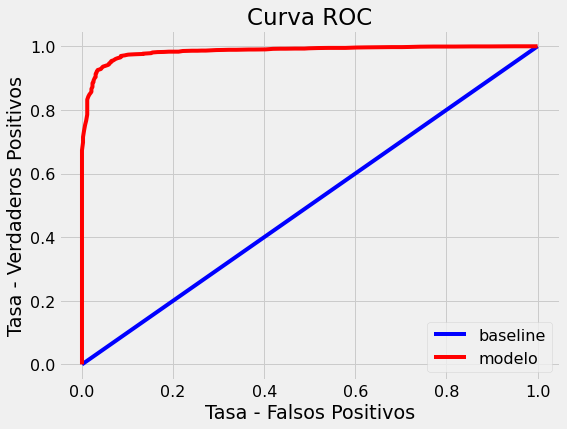

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compara modelos de Machine Learning a traves de la Curva ROC"""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train_res, train_predictions)
    train_results['precision'] = precision_score(y_train_res, train_predictions)
    train_results['roc'] = roc_auc_score(y_train_res, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calcula la tasa de falso positivos y verdaderos positivos
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plotea las curvas
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'modelo')
    plt.legend();
    plt.xlabel('Tasa - Falsos Positivos'); 
    plt.ylabel('Tasa - Verdaderos Positivos'); plt.title('Curva ROC');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LABELS = ["Fuga","Permanencia"]

def mostrar_resultados(y_test, rf_predictions):
    Matriz_Confusion = confusion_matrix(y_test, rf_predictions)
    plt.figure(figsize=(8, 8))
    sns.heatmap(Matriz_Confusion, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='BrBG',linewidths = 0.5);
    plt.title("Matriz de confusión")
    plt.ylabel('Actual')
    plt.xlabel('Predicha')
    plt.show()
    print (classification_report(y_test, rf_predictions))

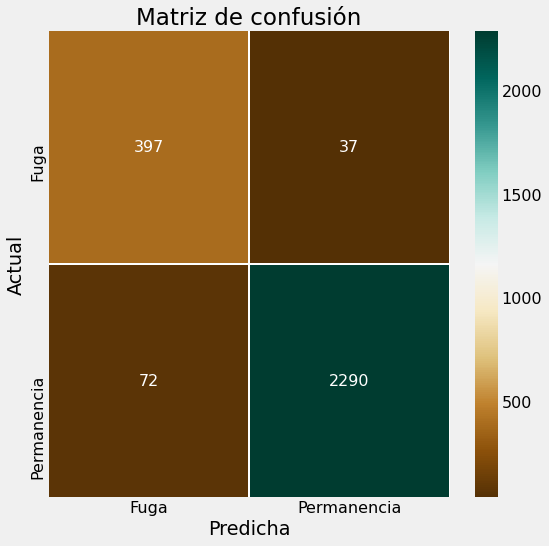

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       434
           1       0.98      0.97      0.98      2362

    accuracy                           0.96      2796
   macro avg       0.92      0.94      0.93      2796
weighted avg       0.96      0.96      0.96      2796



In [ ]:


mostrar_resultados(y_test, rf_predictions)

In [ ]:
from sklearn import metrics
Matriz_Confusion = pd.crosstab(y_test,rf_predictions, rownames=['Actual'], colnames=['Predicted'])
print(Matriz_Confusion)
print('Accuracy: ',metrics.accuracy_score(y_test, rf_predictions))

Predicted    0     1
Actual              
0          397    37
1           72  2290
Accuracy:  0.9610157367668097


In [ ]:
from sklearn.metrics import classification_report

target_names = ['Attrited Customer','Existing Customers']

print(classification_report(y_test,rf_predictions,target_names=target_names))

                    precision    recall  f1-score   support

 Attrited Customer       0.85      0.91      0.88       434
Existing Customers       0.98      0.97      0.98      2362

          accuracy                           0.96      2796
         macro avg       0.92      0.94      0.93      2796
      weighted avg       0.96      0.96      0.96      2796



##**Regresión Logistica**##


In [ ]:
#Regresión logistica#
from sklearn.linear_model import LogisticRegression
logistico= LogisticRegression(max_iter = 10000)
modelo_logistico = logistico.fit(X_train_res,y_train_res)
y_pred_lm = modelo_logistico.predict(X_test)
proba_lm = modelo_logistico.predict_proba(X_test)[:,1]

In [ ]:
#Validacion cruzada Regresion Logistica#
scores = cross_val_score(modelo_logistico, X_train_res, y_train_res, cv=10,scoring='roc_auc')
scores
print((scores.mean(), scores.std()))

(0.934414505176625, 0.009745718856376961)


In [ ]:
roc_value = roc_auc_score(y_test, proba_lm)
roc_value

0.9264643335141273

In [ ]:
train_lm_predictions = modelo_logistico.predict(X_train_res)
train_lm_probs = modelo_logistico.predict_proba(X_train_res)[:, 1]

Recall Baseline: 1.0 Test: 0.84 Train: 0.85
Precision Baseline: 0.84 Test: 0.97 Train: 0.87
Roc Baseline: 0.5 Test: 0.93 Train: 0.94


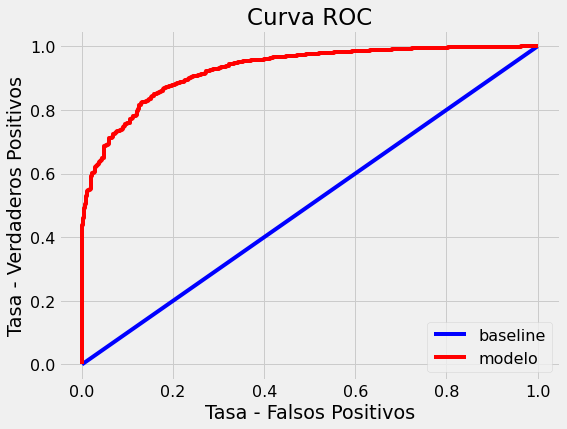

<Figure size 432x288 with 0 Axes>

In [ ]:
evaluate_model(y_pred_lm, proba_lm, train_lm_predictions, train_lm_probs)
plt.savefig('roc_auc_curve.png')

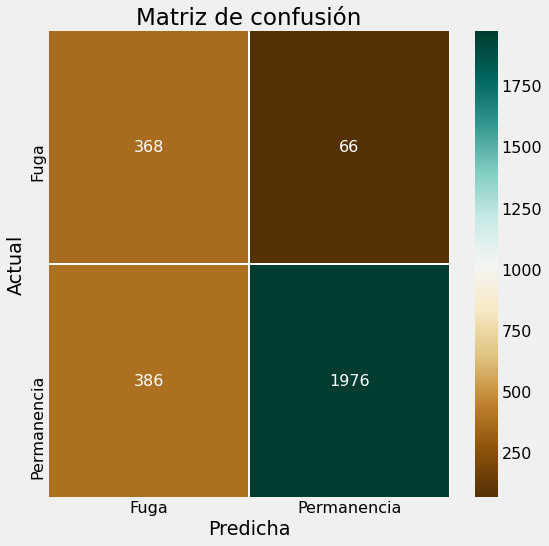

              precision    recall  f1-score   support

           0       0.49      0.85      0.62       434
           1       0.97      0.84      0.90      2362

    accuracy                           0.84      2796
   macro avg       0.73      0.84      0.76      2796
weighted avg       0.89      0.84      0.85      2796



In [ ]:
mostrar_resultados(y_test, y_pred_lm)

In [ ]:
Matriz_Confusion_lm = pd.crosstab(y_test, y_pred_lm, rownames=['Actual'], colnames=['Predicted'])
print(Matriz_Confusion)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_lm))

Predicted    0     1
Actual              
0          397    37
1           72  2290
Accuracy:  0.8383404864091559


In [ ]:
from sklearn.metrics import classification_report

target_names = ['Attrited Customer','Existing Customers']

print(classification_report(y_test,y_pred_lm,target_names=target_names))

                    precision    recall  f1-score   support

 Attrited Customer       0.49      0.85      0.62       434
Existing Customers       0.97      0.84      0.90      2362

          accuracy                           0.84      2796
         macro avg       0.73      0.84      0.76      2796
      weighted avg       0.89      0.84      0.85      2796



##**LGBM**##

In [ ]:
from lightgbm import LGBMClassifier
modelo_lgbm = LGBMClassifier().fit(X_train_res,y_train_res)
y_pred_lgbm = modelo_lgbm.predict(X_test)
proba_lgbm = modelo_lgbm.predict_proba(X_test)[:,1]

In [ ]:
#Validacion cruzada#
scores = cross_val_score(modelo_lgbm, X_train_res, y_train_res, cv=10,scoring='roc_auc')
scores
print((scores.mean(), scores.std()))

(0.9977273343338642, 0.0023846741133389865)


In [ ]:
roc_value = roc_auc_score(y_test, proba_lgbm)
roc_value

0.9902819995551688

In [ ]:
train_pred_lgbm = modelo_lgbm.predict(X_train_res)
train_lgbm_prob = modelo_lgbm.predict_proba(X_train_res)[:, 1]

Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.84 Test: 0.98 Train: 1.0
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


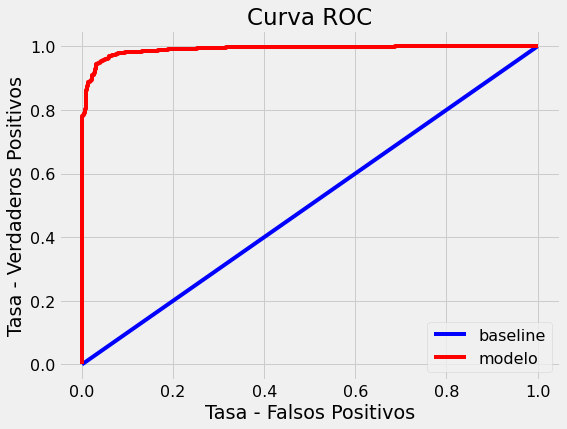

<Figure size 432x288 with 0 Axes>

In [ ]:
evaluate_model(y_pred_lgbm, proba_lgbm, train_pred_lgbm, train_lgbm_prob)
plt.savefig('roc_auc_curve.png')

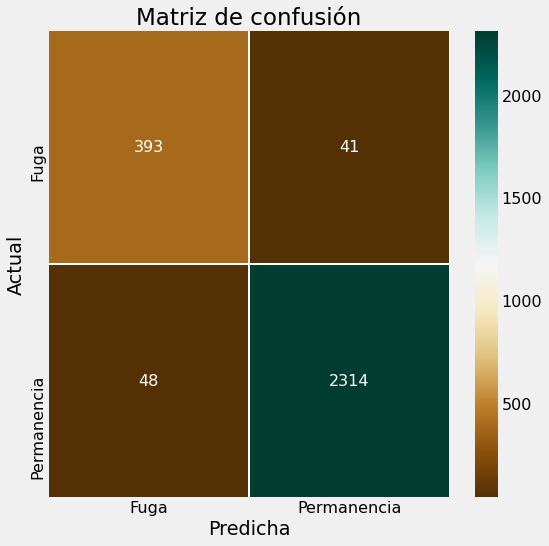

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       434
           1       0.98      0.98      0.98      2362

    accuracy                           0.97      2796
   macro avg       0.94      0.94      0.94      2796
weighted avg       0.97      0.97      0.97      2796



In [ ]:
mostrar_resultados(y_test, y_pred_lgbm)

In [ ]:
Matriz_Confusion_lgbm = pd.crosstab(y_test, y_pred_lgbm, rownames=['Actual'], colnames=['Predicted'])
print(Matriz_Confusion)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_lgbm))

Predicted    0     1
Actual              
0          397    37
1           72  2290
Accuracy:  0.9681688125894135


In [ ]:

from sklearn.metrics import classification_report

target_names = ['Attrited Customer','Existing Customers']

print(classification_report(y_test,y_pred_lgbm,target_names=target_names))

                    precision    recall  f1-score   support

 Attrited Customer       0.89      0.91      0.90       434
Existing Customers       0.98      0.98      0.98      2362

          accuracy                           0.97      2796
         macro avg       0.94      0.94      0.94      2796
      weighted avg       0.97      0.97      0.97      2796



**MODELO GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_gb = GradientBoostingClassifier().fit(X_train_res,y_train_res)
y_pred_gb = modelo_gb.predict(X_test)
proba_gb = modelo_gb.predict_proba(X_test)[:,1]

In [ ]:
#Validacion cruzada#
scores = cross_val_score(modelo_gb, X_train_res, y_train_res, cv=10,scoring='roc_auc')
scores
print((scores.mean(), scores.std()))

(0.9949622058835261, 0.0036212358167673486)


In [ ]:
roc_value = roc_auc_score(y_test, proba_gb)
roc_value

0.9861082929798617

In [ ]:
train_pred_gb = modelo_gb.predict(X_train_res)
train_gb_prob = modelo_gb.predict_proba(X_train_res)[:, 1]

Recall Baseline: 1.0 Test: 0.96 Train: 0.97
Precision Baseline: 0.84 Test: 0.98 Train: 0.98
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


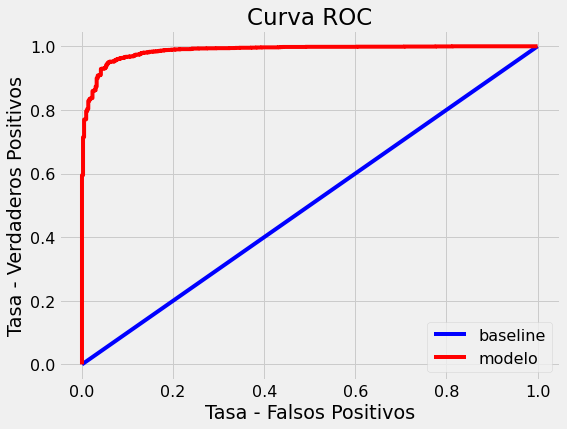

<Figure size 432x288 with 0 Axes>

In [ ]:
evaluate_model(y_pred_gb, proba_gb, train_pred_gb, train_gb_prob)
plt.savefig('roc_auc_curve.png')

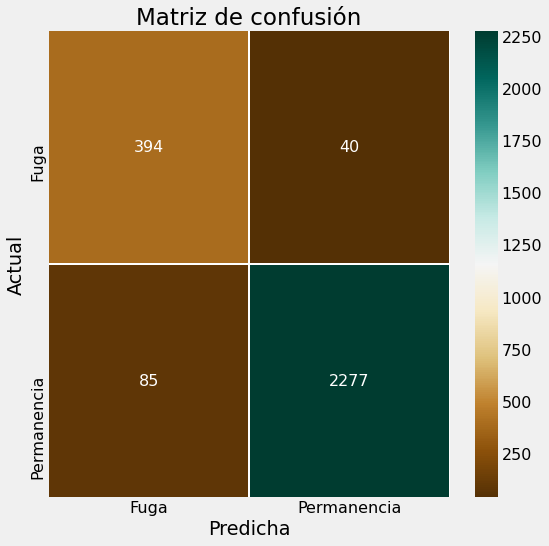

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       434
           1       0.98      0.96      0.97      2362

    accuracy                           0.96      2796
   macro avg       0.90      0.94      0.92      2796
weighted avg       0.96      0.96      0.96      2796



In [ ]:
mostrar_resultados(y_test, y_pred_gb)

In [ ]:
Matriz_Confusion_gb = pd.crosstab(y_test, y_pred_gb, rownames=['Actual'], colnames=['Predicted'])
print(Matriz_Confusion)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_gb))

Predicted    0     1
Actual              
0          397    37
1           72  2290
Accuracy:  0.9552932761087267


In [ ]:
from sklearn.metrics import classification_report

target_names = ['Attrited Customer','Existing Customers']

print(classification_report(y_test,y_pred_gb,target_names=target_names))

                    precision    recall  f1-score   support

 Attrited Customer       0.82      0.91      0.86       434
Existing Customers       0.98      0.96      0.97      2362

          accuracy                           0.96      2796
         macro avg       0.90      0.94      0.92      2796
      weighted avg       0.96      0.96      0.96      2796



MODELO CATBOOST

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 70kB/s 


In [ ]:
from catboost import CatBoostClassifier
modelo_cb = CatBoostClassifier().fit(X_train_res,y_train_res)
y_pred_cb = modelo_cb.predict(X_test)
proba_cb = modelo_cb.predict_proba(X_test)[:,1]

Learning rate set to 0.028501
0:	learn: 0.6551733	total: 62ms	remaining: 1m 1s
1:	learn: 0.6189876	total: 77.3ms	remaining: 38.6s
2:	learn: 0.5938190	total: 88.6ms	remaining: 29.5s
3:	learn: 0.5654633	total: 99.9ms	remaining: 24.9s
4:	learn: 0.5412037	total: 112ms	remaining: 22.2s
5:	learn: 0.5124223	total: 123ms	remaining: 20.4s
6:	learn: 0.4883192	total: 134ms	remaining: 19.1s
7:	learn: 0.4669754	total: 146ms	remaining: 18.1s
8:	learn: 0.4467450	total: 161ms	remaining: 17.7s
9:	learn: 0.4281576	total: 175ms	remaining: 17.3s
10:	learn: 0.4148809	total: 186ms	remaining: 16.8s
11:	learn: 0.4026580	total: 202ms	remaining: 16.7s
12:	learn: 0.3911049	total: 215ms	remaining: 16.3s
13:	learn: 0.3803338	total: 226ms	remaining: 15.9s
14:	learn: 0.3696449	total: 238ms	remaining: 15.6s
15:	learn: 0.3573083	total: 248ms	remaining: 15.3s
16:	learn: 0.3478422	total: 260ms	remaining: 15s
17:	learn: 0.3392540	total: 271ms	remaining: 14.8s
18:	learn: 0.3311103	total: 283ms	remaining: 14.6s
19:	learn: 

In [ ]:
#Validacion cruzada#
scores = cross_val_score(modelo_cb, X_train_res, y_train_res, cv=10,scoring='roc_auc')
scores
print((scores.mean(), scores.std()))

Se han truncado las últimas 5000 líneas del flujo de salida.
5:	learn: 0.5218480	total: 75.4ms	remaining: 12.5s
6:	learn: 0.5023274	total: 84.2ms	remaining: 11.9s
7:	learn: 0.4798990	total: 93ms	remaining: 11.5s
8:	learn: 0.4610686	total: 102ms	remaining: 11.2s
9:	learn: 0.4476614	total: 110ms	remaining: 10.9s
10:	learn: 0.4335277	total: 119ms	remaining: 10.7s
11:	learn: 0.4191994	total: 128ms	remaining: 10.5s
12:	learn: 0.4046348	total: 136ms	remaining: 10.4s
13:	learn: 0.3926160	total: 145ms	remaining: 10.2s
14:	learn: 0.3812822	total: 154ms	remaining: 10.1s
15:	learn: 0.3687342	total: 163ms	remaining: 10s
16:	learn: 0.3581933	total: 172ms	remaining: 9.94s
17:	learn: 0.3490579	total: 181ms	remaining: 9.85s
18:	learn: 0.3417754	total: 189ms	remaining: 9.78s
19:	learn: 0.3331986	total: 198ms	remaining: 9.72s
20:	learn: 0.3242645	total: 207ms	remaining: 9.65s
21:	learn: 0.3159151	total: 216ms	remaining: 9.59s
22:	learn: 0.3090386	total: 228ms	remaining: 9.7s
23:	learn: 0.3025910	total: 

In [ ]:
roc_value = roc_auc_score(y_test, proba_cb)
roc_value

0.9924329924261639

In [ ]:
train_pred_cb = modelo_cb.predict(X_train_res)
train_cb_prob = modelo_cb.predict_proba(X_train_res)[:, 1]

Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.84 Test: 0.98 Train: 1.0
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


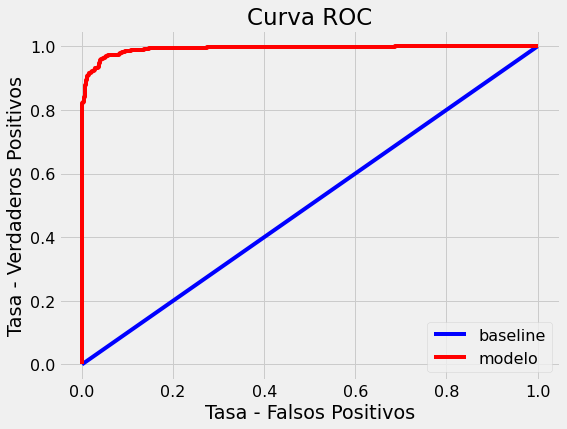

<Figure size 432x288 with 0 Axes>

In [ ]:
evaluate_model(y_pred_cb, proba_cb, train_pred_cb, train_cb_prob)
plt.savefig('roc_auc_curve.png')

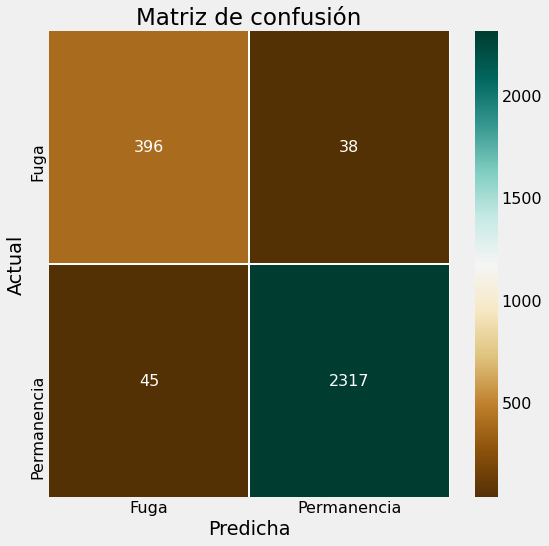

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       434
           1       0.98      0.98      0.98      2362

    accuracy                           0.97      2796
   macro avg       0.94      0.95      0.94      2796
weighted avg       0.97      0.97      0.97      2796



In [ ]:
mostrar_resultados(y_test, y_pred_cb)

In [ ]:
Matriz_Confusion_cb = pd.crosstab(y_test, y_pred_cb, rownames=['Actual'], colnames=['Predicted'])
print(Matriz_Confusion)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_cb))

Predicted    0     1
Actual              
0          397    37
1           72  2290
Accuracy:  0.9703147353361946


In [ ]:
from sklearn.metrics import classification_report

target_names = ['Attrited Customer','Existing Customers']

print(classification_report(y_test,y_pred_cb,target_names=target_names))

                    precision    recall  f1-score   support

 Attrited Customer       0.90      0.91      0.91       434
Existing Customers       0.98      0.98      0.98      2362

          accuracy                           0.97      2796
         macro avg       0.94      0.95      0.94      2796
      weighted avg       0.97      0.97      0.97      2796



**Comparación de resultados**


Realizamos el análisis y la comparación por el lado de "Attrited Customer"(fuga), asi que a continuación veremos la comparación mediante la precisión, accuracy y el mas importante en nuestro análisis por la cual determinamos el mejor modelo, es el f1-score:

In [ ]:

df = pd.DataFrame({'Modelo' : ['Regresion Logística', 'Random Forest', 'LGBM', 
                                  'GradientBoosting', 'Catboost'],
                   'precision' : [0.49, 0.83, 0.89, 0.82, 0.90],
                   'accuracy' : [0.84, 0.96, 0.97, 0.96, 0.97],
                   'f1-score' : [0.62, 0.87, 0.90, 0.86, 0.91]})


df = df.sort_values(['f1-score'], ascending=False)
df

,Modelo,precision,accuracy,f1-score
4,Catboost,0.90,0.97,0.91
2,LGBM,0.89,0.97,0.90
1,Random Forest,0.83,0.96,0.87
3,GradientBoosting,0.82,0.96,0.86
0,Regresion Logística,0.49,0.84,0.62


##**Conclusiones:**##
Como para nuestro caso nos interesa mas tener una mejor tasa de prediccion correcta dentro de la categoria de clientes que fugan, segun las metricas analizadas se consideraria como mejor modelo el catboost ya que posee un f1-score para la categoria de 'Attrited Customer' de 0.91 en comparacion del 0.90 del LGBM, 0.86 del Ramdon Forest, 0.86 de GradientBoosting y 0.62 de la Regresión Logistica. 

##**Prueba de Hipotesis**##

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
# Significancia
Significancia = 0.05
# Entradas
pred_exitos = 2713
total = 2796
# Ho = 0.5
Hipotesis_nula = 0.5
# Ho: p <=0.5
# H1: p > 0.5
stat, p_value = proportions_ztest(count=pred_exitos, nobs=total, value=Hipotesis_nula, alternative='larger')
# reporte
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > Significancia:
   print ("No se rechaza la hipotesis Nula ")
else:
   print ("Se rechaza la hipotesis nula - Se puede afirmar que la hipotesis alterna es verdadera")

z_stat: 146.531, p_value: 0.000
Se rechaza la hipotesis nula - Se puede afirmar que la hipotesis alterna es verdadera


##**Componentes Principales**##

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,svd_solver='full')
pc = pca.fit_transform(X)
print('Components Variance:')
print('1st: %.3f' % pca.explained_variance_ratio_[0])
print('2nd: %.3f' % pca.explained_variance_ratio_[1])
print('3rd: %.3f' % pca.explained_variance_ratio_[2])
print('4rd: %.3f' % pca.explained_variance_ratio_[3])
print('5rd: %.3f' % pca.explained_variance_ratio_[4])

In [ ]:
plt.scatter(pc[:, 0], pc[:, 1], c=y)
plt.title("PCA")
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.show()

**Comentarios:** Segun se observa luego de aplicar el algoritmo de PCA los componentes en los cuales se agrupa no contemplan la mayor parte de la variabilidad por lo que en una primera instancia no seria una buena idea tomar en cuenta el PCA.

##**FeedBack - Primera Presentacion** 

Clustering para identificar patrones dentro de los clientes que fugan

In [ ]:
#Clustering -> Este punto se dio de feedback : Identificar patrones dentro de los
#clientes que "fugan" del banco a traves de tecnicas de clustering/PCA nos ayudaria a identificar cuando un cliente este a punto de retirarse.
cli_fuga = banco[banco['Attrition_Flag']=='Attrited Customer']
print(cli_fuga.shape)
cli_fuga.head()

In [ ]:
#Tomando unicamente las variables numericas#
cli_fuga_num = cli_fuga.loc[:,cli_fuga.dtypes!=np.object]
cli_fuga_num = cli_fuga_num.drop('CLIENTNUM',axis=1)
cli_fuga_num.head()
X_num= cli_fuga_num

In [ ]:
#Normalizando los datos#
X_clu = preprocessing.normalize(X_num, norm='l2')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist 

In [ ]:
#K optimo para nuestro k- means
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X_clu) 
    kmeanModel.fit(X_clu)     
      
    distortions.append(sum(np.min(cdist(X_clu, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_clu.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_clu, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_clu.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [ ]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() #El optimo puede ser 3#

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X_clu)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
X_num['cluster'] = KMeans(n_clusters=2).fit_predict(X_clu)

In [ ]:
sns.relplot(x='Months_Inactive_12_mon',y='Total_Trans_Ct',kind='scatter',hue='cluster',data=X_num)

In [ ]:
sns.relplot(x='Customer_Age',y='Credit_Limit',kind='scatter',hue='cluster',data=X_num)

In [ ]:
sns.relplot(x='Customer_Age',y='Months_on_book',kind='scatter',hue='cluster',data=X_num)

**Comentario:** Al aplicar una análisis cluster al parecer no se diferencia por medio de las numericas si existe un patron constante que defina que un cliente se quede o fugue